<a href="https://colab.research.google.com/github/sethhardik/SHALA2020/blob/master/Assignment_ML_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

### NOTE TO SELF :
In Grid Search, we try every combination of a preset list of values of the hyper-parameters and choose the best combination based on the cross validation score.

Random search tries random combinations of a range of values (we have to define the number iterations). It is good in testing a wide range of values and normally it reaches a very good combination very fast, but the problem that it doesn’t guarantee to give the best parameters combination.

On the other hand, Grid search will give the best combination but it can take a lot of time.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,roc_curve,confusion_matrix,roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.shape

(891, 12)

## `nan management` 

In [4]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
titanic_data=titanic_data.drop(["Cabin","Ticket","Name","PassengerId"],axis=1)
titanic_data["Age"]=titanic_data["Age"].fillna(titanic_data["Age"].mean())
titanic_data=titanic_data.dropna()  # dropping the last 2 nan in the data
print(titanic_data.isna().sum())
print(titanic_data.shape)
titanic_data.head()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
(889, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## feature selection using heatmap


[]

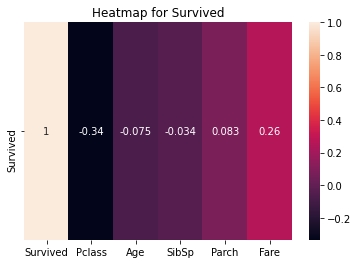

In [6]:
data_corr=titanic_data.corr()
sns.heatmap(data_corr.iloc[0:].head(1),annot=True)
plt.title("Heatmap for Survived")
plt.plot()

## feature selection for categorical data


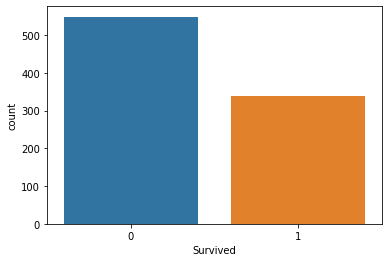

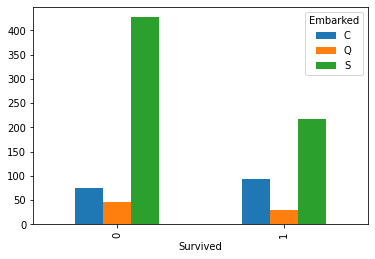

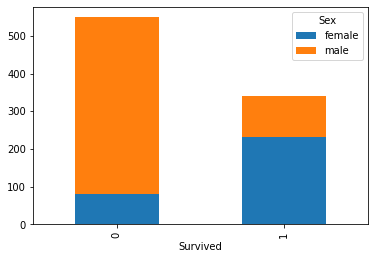

In [7]:
sns.countplot(titanic_data.Survived)
plt.show()
cross=pd.crosstab(titanic_data["Survived"],titanic_data["Embarked"])        
cross.plot.bar()
plt.show()
cross1=pd.crosstab(titanic_data["Survived"],titanic_data["Sex"])        
cross1.plot.bar(stacked=True)
plt.show()

#` handling categorical dataset `

In [8]:
sex = pd.get_dummies(titanic_data.Sex,drop_first=True,prefix="Sex")
embarked = pd.get_dummies(titanic_data.Embarked,drop_first=True,prefix="Embarked")
titanic_data=pd.concat([titanic_data,sex,embarked],axis=1)
titanic_data=titanic_data.drop(["Sex","Embarked"],axis=1)
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [9]:
titanic_data.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

Upscalling the dataset we have to balance out the datatset

In [0]:
from sklearn.utils import resample
titanic_data_major = titanic_data[titanic_data.Survived==0]
titanic_data_minor = titanic_data[titanic_data.Survived==1]
titanic_data_upscale = resample(titanic_data_minor,replace= True,n_samples=549,random_state=100)
titanic_data=pd.concat([titanic_data_major,titanic_data_upscale])

In [11]:
titanic_data.Survived.value_counts()

1    549
0    549
Name: Survived, dtype: int64

In [12]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
5,0,3,29.699118,0,0,8.4583,1,1,0
6,0,1,54.000000,0,0,51.8625,1,0,1
7,0,3,2.000000,3,1,21.0750,1,0,1


`X` and `Y` splitting of data

In [13]:
X = titanic_data.drop(["Survived"],axis=1)
Y = titanic_data.Survived
print(X.shape)
print(Y.shape)

(1098, 8)
(1098,)


As we are asked to use tree based models on our dataset it's not necessary to `normalize` the data. `Hence skipping it`.


### `function for multiple repeteted plots and score calculation`

In [0]:
def roc_curve_do(c_name,classifier):
  probs = classifier.predict_proba(x_test)  
  probs = probs[:, 1]  
  fper, tper, thresholds = roc_curve(y_test, probs) 
  plt.plot(fper, tper)
  plt.plot([0,1], [0,1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('{} ROC curve'.format(c_name))
  # show the plot
  plt.show()

def kfold(classifier,cv):
  score=cross_val_score(classifier,X,Y,cv=cv)
  print("Individual Score:",score)
  print("Mean Score:",score.mean()*100,"%")
  # plot
  plt.plot(np.arange(cv), score, 'o-', linewidth=1)
  plt.title("Accuracy: %f%% and Deviation (%f%%)" % (score.mean()*100, score.std()*100))
  plt.xlabel('number of Folds')
  plt.ylabel('Accuracy score')
  plt.show()

def all_score(classifier):
  predict=classifier.predict(x_test)
  print("testing accuracy:",accuracy_score(y_test,predict))
  print("training accuracy:",accuracy_score(y_train,classifier.predict(x_train)))
  print(confusion_matrix(y_test,predict))
  print("Classification report:\n",classification_report(y_test,predict))


##`Machine Learning`

In [15]:
# splitting data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=125,stratify=Y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(878, 8)
(220, 8)
(878,)
(220,)


## `random forest classifier`

testing accuracy: 0.9
training accuracy: 0.9840546697038725
[[99 11]
 [11 99]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       110
           1       0.90      0.90      0.90       110

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



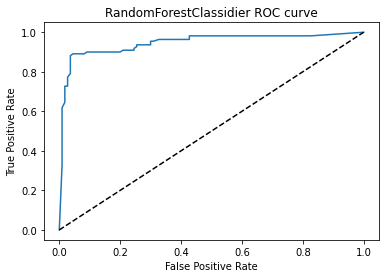

In [16]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
all_score(rfc)
# roc curve 
roc_curve_do("RandomForestClassidier",rfc)

###  k fold method 


Individual Score: [0.86363636 0.84545455 0.88181818 0.87272727 0.93636364 0.89090909
 0.89090909 0.87272727 0.88990826 0.89908257]
Mean Score: 88.43536280233528 %


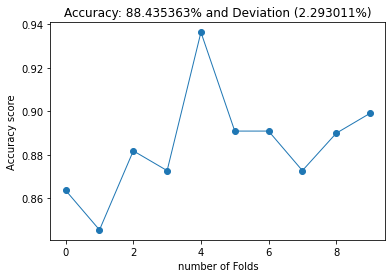

In [17]:
kfold(rfc,10)

### `grid search for hyperparameters`


In [18]:
parameters={
    'n_estimators': [100,200,300],
    'max_depth': [None,4,5,6,7],
    'criterion': ['gini','entropy']
}
rfc_new=RandomForestClassifier()
grid_search=GridSearchCV(
    estimator=rfc_new,
    param_grid=parameters,
    n_jobs=-1,
    cv=3,
    verbose=True
)
grid_search.fit(x_train,y_train)

best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   21.8s finished


{'criterion': 'gini', 'max_depth': None, 'n_estimators': 300}

#### after gridsearch 

testing accuracy: 0.9
training accuracy: 0.9840546697038725
[[ 98  12]
 [ 10 100]]
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       110
           1       0.89      0.91      0.90       110

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



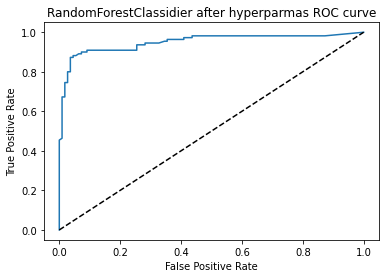

In [19]:
rfc_hyper=RandomForestClassifier( n_estimators= 300)
rfc_hyper.fit(x_train,y_train)
all_score(rfc_hyper)

# roc curve 
roc_curve_do("RandomForestClassidier after hyperparmas",rfc_hyper)

## `Decision Tree`

testing accuracy: 0.8954545454545455
training accuracy: 0.9840546697038725
[[98 12]
 [11 99]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       110
           1       0.89      0.90      0.90       110

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



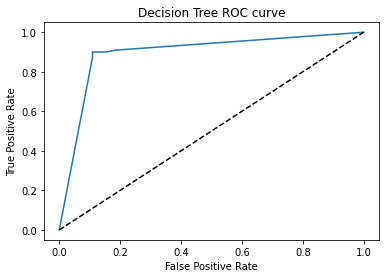

In [20]:
# Decision tree classifier
dectree=DecisionTreeClassifier()
dectree.fit(x_train,y_train)
all_score(dectree)
# roc curve 
roc_curve_do("Decision Tree",dectree)

## `XGB Classifier `

testing accuracy: 0.8545454545454545
training accuracy: 0.8747152619589977
[[93 17]
 [15 95]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       110
           1       0.85      0.86      0.86       110

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



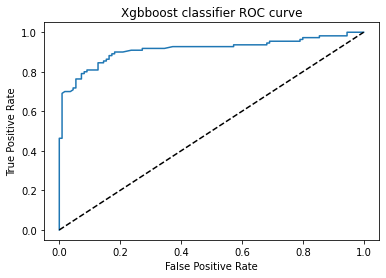

In [21]:
# xgbboost classifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
all_score(xgb)

# roc curve 

roc_curve_do("Xgbboost classifier",xgb)

###  k fold method 


Individual Score: [0.85909091 0.86818182 0.9        0.87671233 0.89041096]
Mean Score: 87.88792029887921 %


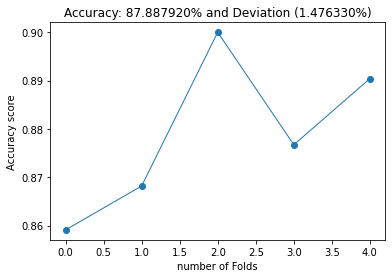

In [22]:
kfold(rfc,5)

### `grid search for hyperparameters`

In [23]:
parameter={
    "max_depth":[None,2,3,4,5,6],
    "learning_rate":[0.1,0.01,0.5,0.005],
    "n_estimators":[100,200,300],
    "gamma": [0.5, 1, 1.5],
    'min_child_weight': [1, 5, 10]
}
xgb_class_new=XGBClassifier()
grid_search=GridSearchCV(
    estimator=xgb_class_new,
    param_grid=parameter,
    n_jobs=-1,
    cv=3,
    verbose=True
)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 167 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 482 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 1452 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed:  1.8min finished


{'gamma': 0.5,
 'learning_rate': 0.5,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 100}

### after grid search

testing accuracy: 0.9045454545454545
training accuracy: 0.9578587699316629
[[100  10]
 [ 11  99]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       110
           1       0.91      0.90      0.90       110

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



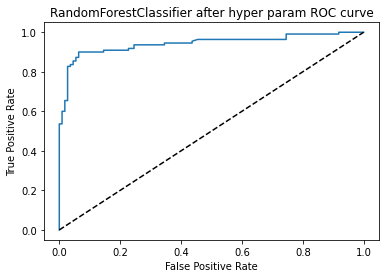

In [24]:
xgb=XGBClassifier(gamma= 0.5,learning_rate= 0.5,max_depth=6,min_child_weight= 1,n_estimators= 100) 
xgb.fit(x_train,y_train)
all_score(xgb)

# roc curve 

roc_curve_do("RandomForestClassifier after hyper param",xgb)

## `Adaboost Classifier`

testing accuracy: 0.8681818181818182
training accuracy: 0.9840546697038725
[[92 18]
 [11 99]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       110
           1       0.85      0.90      0.87       110

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



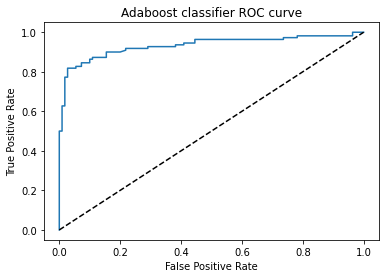

In [25]:
dt = DecisionTreeClassifier()
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)
adb_clf.fit(x_train, y_train)
all_score(adb_clf)

# plot
roc_curve_do("Adaboost classifier",adb_clf)

### hyperpramaters setting

In [26]:
parameter={
    "learning_rate":[0.1,0.01,0.5,0.005],
    "n_estimators":[100,200,300,50]
}
adb_clf_new = AdaBoostClassifier(base_estimator=dt)
grid_search=GridSearchCV(
    estimator=xgb_class_new,
    param_grid=parameter,
    n_jobs=-1,
    cv=3,
    verbose=True
)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    2.5s finished


{'learning_rate': 0.5, 'n_estimators': 200}

testing accuracy: 0.8818181818181818
training accuracy: 0.9840546697038725
[[96 14]
 [12 98]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       110
           1       0.88      0.89      0.88       110

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



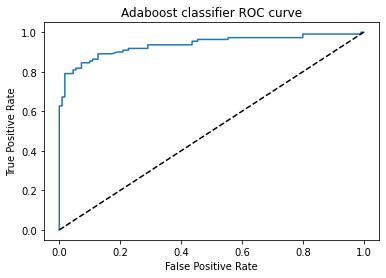

In [27]:
dt = DecisionTreeClassifier()
adb_clf_update = AdaBoostClassifier(base_estimator=dt, n_estimators=200,learning_rate=0.5)
adb_clf_update.fit(x_train, y_train)
all_score(adb_clf_update)

# plot
roc_curve_do("Adaboost classifier",adb_clf_update)

### `GradientBoostingClassifier `

testing accuracy: 0.9090909090909091
training accuracy: 0.9419134396355353
[[ 97  13]
 [  7 103]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       110
           1       0.89      0.94      0.91       110

    accuracy                           0.91       220
   macro avg       0.91      0.91      0.91       220
weighted avg       0.91      0.91      0.91       220



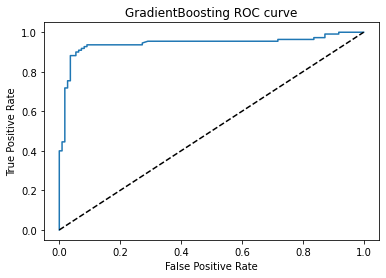

In [28]:
gbc=GradientBoostingClassifier(n_estimators=300)
gbc.fit(x_train,y_train)

all_score(gbc)
# plot
roc_curve_do("GradientBoosting",gbc)

### `BaggingClassifier`

testing accuracy: 0.8954545454545455
training accuracy: 0.9840546697038725
[[ 97  13]
 [ 10 100]]
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       110
           1       0.88      0.91      0.90       110

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



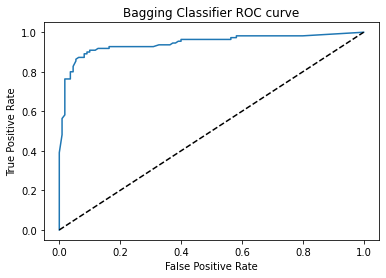

In [29]:
dt=DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=dt, n_estimators=100, n_jobs=-1) # n_jobs=-1 means that all the CPU cores are used in computation. 
bc.fit(x_train, y_train)

all_score(bc)

# plot
roc_curve_do("Bagging Classifier",bc)

### K fold

Individual Score: [0.84545455 0.86363636 0.86363636 0.89090909 0.9        0.86363636
 0.90909091 0.85454545 0.89908257 0.90825688]
Mean Score: 87.98248540450375 %


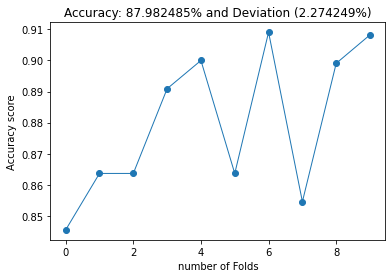

In [30]:
kfold(bc,10)

## feature importance using random *forest*


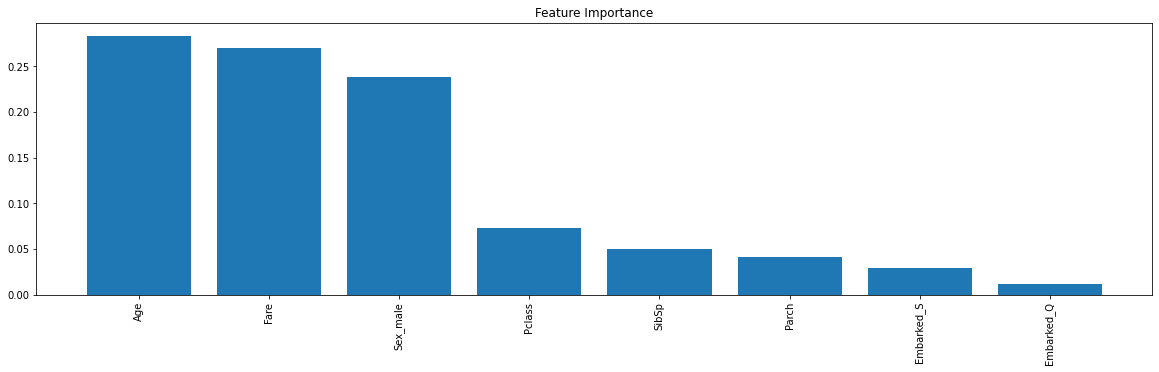

In [31]:
rfc1=RandomForestClassifier(n_estimators=300)
model=rfc1.fit(x_train,y_train)
# calculated by out of bag data while baaging in randomforest.
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

plt.figure(figsize=(20,5))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

# max accuracy without overfitting is given by Xgboost classifier